# Expectation - Maximization

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

### Definición de funciones

In [30]:
def experiment(M, size, which_coin_prior=[0.5, 0.5]):
    experiments = []
    thetas = [0.2, 0.8], [0.4, 0.6]
    for i in range(M):
        p = thetas[np.random.choice([0, 1], p=which_coin_prior)]
        experiments.append(np.random.choice([0, 1], size=size, p=p))
    return np.array(experiments)

In [31]:
M = 100
tosses_ = experiment(M, 10)

In [32]:
def expectation_step(tosses, theta_a, theta_b):
    p_za = p_zb = 0.5
    p_exp_za = binom(10, theta_a).pmf(tosses.sum(axis=1))
    p_exp_zb = binom(10, theta_b).pmf(tosses.sum(axis=1))
    denom = p_exp_za * p_za + p_exp_zb * p_zb
    return (p_exp_za * p_za) / denom, (p_exp_zb * p_zb) / denom

In [33]:
theta_a_init = np.random.uniform(0, 1)
theta_b_init = np.random.uniform(0, 1)
p_za_exp, p_zb_exp = expectation_step(tosses_, theta_a_init, theta_b_init)
p_zb_exp[0]

1.5067553940215975e-09

In [34]:
def maximization_step(tosses, p_za_exp, p_zb_exp):
    max_theta_a = (p_za_exp * tosses.sum(axis=1)).sum() / (p_za_exp * 10).sum()
    max_theta_b = (p_zb_exp * tosses.sum(axis=1)).sum() / (p_zb_exp * 10).sum()
    return max_theta_a, max_theta_b

In [35]:
maximization_step(tosses_, p_za_exp, p_zb_exp)

(0.7524062499587786, 0.31736693768405266)

## Experimento Completo

In [46]:
M = 100

tosses = experiment(M, 10)

theta_as = [np.random.uniform(0, 1)]
theta_bs = [np.random.uniform(0, 1)]
likelihoods = [0]
epsilon = 0.01

steps = 100

for i in range(steps):
    theta_a = theta_as[-1]
    theta_b = theta_bs[-1]
    p_za_exp, p_zb_exp = expectation_step(tosses, theta_a, theta_b)
    
    # falta calcular la likelihood (para ver la convergencia)
    # if abs(likelihoods[-1] - likelihoods[-2]) < epsilon:
        # break
    
    theta_a_max, theta_b_max = maximization_step(tosses, p_za_exp, p_zb_exp)
    theta_as.append(theta_a_max)
    theta_bs.append(theta_b_max)

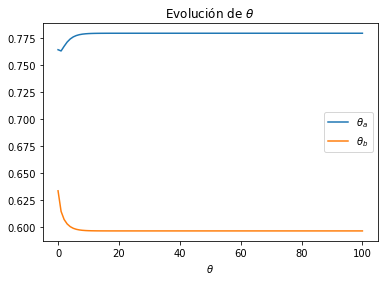

In [47]:
plt.title('Evolución de $\\theta$')
plt.plot(range(len(theta_as)), theta_as)
plt.plot(range(len(theta_bs)), theta_bs)
plt.legend(['$\\theta_a$', '$\\theta_b$'])
plt.xlabel('Iteración')
plt.xlabel('$\\theta$')
plt.show()

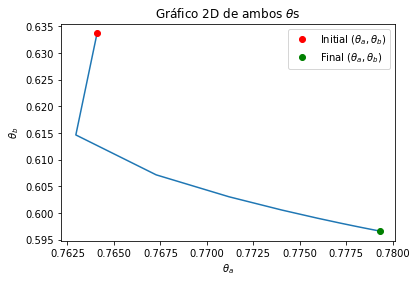

In [48]:
plt.title('Gráfico 2D de ambos $\\theta$s')
plt.plot(theta_as, theta_bs)
plt.plot(theta_as[0], theta_bs[0], 'ro', label='Initial $(\\theta_a, \\theta_b)$')
plt.plot(theta_as[-1], theta_bs[-1], 'go', label='Final $(\\theta_a, \\theta_b)$')
plt.legend()
plt.xlabel('$\\theta_a$')
plt.ylabel('$\\theta_b$')
plt.show()